In [ ]:
#Import the necessary files
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization as batch_normalization
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
# from scikeras.wrappers import KerasClassifier
import seaborn as sns

RANDOM_SEED = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# #Load dataset and specify paths
dataset = "/content/drive/My Drive/ISL_Datasets"
model_save_path = "/content/keypoint_classifier.keras"
#tflite_save_path= "keypointlclassifier.tflite"
tflite_save_path = '/content/keypoint_classifier.tflite'
hd5_save_path = '/content/keypoint_classifier.h5'

LOAD DATASETS AND SEPARATE THE DATA INTO NUMPY ARRAYS

In [41]:
#train_save_path = f'{dataset}/standardized_keypoint_right_left_train.csv'
#test_save_path = f'{dataset}/standardized_keypoint_right_left_test.csv'
#val_save_path = f'{dataset}/standardized_keypoint_right_left_test_val.csv'

#train_df = pd.read_csv(train_save_path)
#test_df = pd.read_csv(test_save_path)
#val_df = pd.read_csv(val_save_path)

# Load dataset
data_path = f"{dataset}/rotated_right_handed_landmarks 18t Jan - 29th Apr.csv" #Path to training dataset
data = pd.read_csv(data_path)
#data = pd.read_excel(data_path)


val_save_path = f'{dataset}/rotated_right_handed_landmarks 18th Jan.csv'
val_data = pd.read_csv(val_save_path)

In [44]:
data.head()

,Alphabet,left_x1,left_y1,left_x2,left_y2,left_x3,left_y3,left_x4,left_y4,left_x5,...,left_x76,left_x77,left_x78,left_x79,left_x80,left_x81,left_x82,left_x83,left_x84,Unnamed: 85
0,A,0.712766,0.054965,0.489362,-0.267730,0.368794,-0.544326,0.273050,-0.739362,0.170213,...,-0.377660,-0.971631,-0.480496,-0.748227,-0.484043,-0.652482,-0.395390,-0.670213,-0.356383,NaN
1,A,0.706619,0.069767,0.488372,-0.262970,0.377460,-0.542039,0.288014,-0.742397,0.173524,...,-0.395349,-0.974955,-0.491950,-0.771020,-0.509839,-0.660107,-0.434705,-0.649374,-0.395349,NaN
2,A,0.706294,0.085664,0.489510,-0.253497,0.377622,-0.526224,0.293706,-0.718531,0.185315,...,-0.417832,-0.926573,-0.515734,-0.720280,-0.515734,-0.622378,-0.438811,-0.625874,-0.403846,NaN
3,A,0.715789,-0.059649,0.431579,-0.347368,0.270175,-0.596491,0.150877,-0.764912,0.010526,...,-0.280702,-1.000000,-0.308772,-0.803509,-0.340351,-0.698246,-0.284211,-0.698246,-0.259649,NaN
4,A,0.661538,-0.059829,0.377778,-0.340171,0.223932,-0.586325,0.104274,-0.747009,-0.035897,...,-0.251282,-1.000000,-0.285470,-0.811966,-0.326496,-0.709402,-0.261538,-0.726496,-0.227350,NaN


In [57]:
# Separate features and labels (Assuming last column is the label)
X = np.array(data.iloc[:, 1:-1])
y = np.array(data.iloc[:, 0]) #assuming the first column contains target alphabets

In [58]:
print(X.shape)
print(y.shape)

(911, 84)
(911,)


In [59]:
print(X)

[[ 0.71276596  0.05496454  0.4893617  ... -0.39539007 -0.67021277
  -0.35638298]
 [ 0.70661896  0.06976744  0.48837209 ... -0.43470483 -0.64937388
  -0.39534884]
 [ 0.70629371  0.08566434  0.48951049 ... -0.43881119 -0.62587413
  -0.40384615]
 ...
 [ 0.55791711 -0.22848034  0.51328374 ...  0.46865037 -0.29649309
   0.43889479]
 [ 0.56727664 -0.23896663  0.532831   ...  0.47793326 -0.30678149
   0.45209903]
 [ 0.57081545 -0.24463519  0.53004292 ...  0.48068669 -0.30472103
   0.45064378]]


In [ ]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42) # Amogh : add stratify = y for data stratification

In [ ]:
print(X_train.size)

695268


In [45]:
# Custom converter function to convert characters to ASCII values
# retuns a list of encoded capital alphabets
def char_to_ascii(alphabets):
   return [(ord(char) - ord('A')) for char in alphabets]  # Convert character to ASCII value
    #if 0 <= ascii_val <= 25:  # Ensure ASCII value is within range
     #   return ascii_val
    #else:
     #   raise ValueError("Character '{}' is out of range (A-Z)".format(char))

In [ ]:
#Storing validation data and labels
# X_val = np.array(val_data.iloc[:, 1:])
# Y_val = np.array(val_data.iloc[:, 0])

In [ ]:
# print(Y_val)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'G'
 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G

In [ ]:
# Converting the list returned by char_to_ascii to a numpy array
# y_train = np.array(char_to_ascii(Y_train))
# y_test = np.array(char_to_ascii(Y_test))
# y_val = np.array(char_to_ascii(Y_val))

In [62]:
# Converting the list returned by char_to_ascii to a numpy array
y = np.array(char_to_ascii(y))

In [63]:
print(y.size)

911


BUILDING THE NEURAL NETWORK

In [ ]:
# neurons and depth are passed as arguments because we are trying to optimize the network w.r.t these hyperparameters
def create_model(neurons=1, depth=40):

  model = Sequential()

  #Input Layer
  model.add(Dense(neurons, input_dim=84, activation='relu'))
  model.add(batch_normalization())

  # Add hidden layers based on depth, with 'neurons' as the number of units
  for i in range(depth-1):
      model.add(Dense(neurons, activation='relu'))
      model.add(batch_normalization())
  model.add(Dropout(0.3))

  #Output layer for 26 alphabet classes
  model.add(Dense(26, activation='softmax'))

  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

  return model

### Defining the Hyperparameter Space

In [ ]:
param_grid = {'model__neurons' : [40, 50, 60],
              'model__depth' : [1, 2, 3]}
#3X3=9 possible combinations

In [ ]:
!pip install scikeras

In [ ]:
pip uninstall tensorflow scikit-learn scikeras

Found existing installation: scikeras 0.13.0
Uninstalling scikeras-0.13.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/LICENSE
    /usr/local/lib/python3.11/dist-packages/scikeras-0.13.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikeras/*
Proceed (Y/n)? Y
  Successfully uninstalled scikeras-0.13.0


In [ ]:
!pip install tensorflow==2.12.0 scikit-learn==1.5.2 scikeras==0.13.0 #These specific versions of tf, sklearn and scikeras ensure that KerasClassifier can be used properly with GridSearchCV

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install scikeras==0.13.0 and tensorflow==2.12.0 be

In [ ]:
pip show scikit-learn scikeras tensorflow

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
# Define StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Define the model using KerasClassifier method.
#This makes our keras model available for GridSearch
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=1, depth=1, neurons=40)

### Using GridSearchCV for Hyperparameter tuning

In [ ]:
#Provide the metric for KFold crossvalidation. cv=3 is a good starting point
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=skf)

# grid_result = grid.fit(X_train, y_train)

grid_result = grid.fit(X, y)

best_model = grid_result.best_estimator_.model
#if best_model is not None:
#    best_model.save('best_model.h5')
#else:
#    print("No best model found")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
pip show scikeras

In [ ]:
print(KerasClassifier.__module__)

scikeras.wrappers


##Regular Cross-Validation


In [64]:
print("X dtype:", X.dtype, "| shape:", X.shape)
print("y dtype:", y.dtype, "| shape:", y.shape)
print("Unique labels:", np.unique(y))
print(len(np.unique(y)))

X dtype: float32 | shape: (911, 84)
y dtype: int64 | shape: (911,)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
26


In [65]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping

# === 1. Example Data ===
# Replace with your actual data
# X = np.random.rand(100, 20)  # 100 samples, 20 features
# y = np.random.randint(0, 3, size=100)  # 3 classes (0, 1, 2)

num_classes = len(np.unique(y))  # dynamically determine number of classes

# === 2. Define a model builder ===
def create_model(neurons=40, depth=1):

  model = Sequential()

  #Input Layer
  model.add(Dense(neurons, input_dim=84, activation='relu'))
  model.add(batch_normalization())

  # Add hidden layers based on depth, with 'neurons' as the number of units
  for i in range(depth-1):
      model.add(Dense(neurons, activation='relu'))
      model.add(batch_normalization())
  model.add(Dropout(0.3))

  #Output layer for 26 alphabet classes
  model.add(Dense(26, activation='softmax'))

  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

  return model

# === 3. Manual Stratified 10-Fold Cross-Validation ===
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = []
fold = 1

X = X.astype(np.float32)
for train_index, val_index in kf.split(X, y):
    print(f"Training Fold {fold}...")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = create_model()

    # Optional: early stopping to prevent overfitting
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=10, batch_size=32, verbose=0, callbacks=[es])

    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    scores.append(acc)
    fold += 1

# === 4. Report Results ===
print("\nFinal Results:")
print("Per-fold Accuracies:", scores)
print("Mean Accuracy: %.2f%%" % (np.mean(scores) * 100))
print("Std Dev: %.2f%%" % (np.std(scores) * 100))


Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Accuracy: 0.9348
Training Fold 2...
Fold 2 Accuracy: 0.9560
Training Fold 3...
Fold 3 Accuracy: 0.9121
Training Fold 4...
Fold 4 Accuracy: 0.9560
Training Fold 5...
Fold 5 Accuracy: 0.9451
Training Fold 6...
Fold 6 Accuracy: 0.9121
Training Fold 7...
Fold 7 Accuracy: 0.9341
Training Fold 8...
Fold 8 Accuracy: 0.9231
Training Fold 9...
Fold 9 Accuracy: 0.9451
Training Fold 10...
Fold 10 Accuracy: 0.9670

Final Results:
Per-fold Accuracies: [0.9347826242446899, 0.9560439586639404, 0.9120879173278809, 0.9560439586639404, 0.9450549483299255, 0.9120879173278809, 0.9340659379959106, 0.9230769276618958, 0.9450549483299255, 0.9670329689979553]
Mean Accuracy: 93.85%
Std Dev: 1.78%


In [40]:
model.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_154 (Dense)               │ (None, 40)             │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 26)             │         1,066 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,720 (53.60 KB)

 Trainable params: 4,546 (17.76 KB)

 Non-trainable params: 80 (320.00 B)

 Optimizer params: 9,094 (35.53 KB)

In [ ]:
# Load dataset
# Define the print_confusion_matrix function
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap='Blues', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))


predicted_probabilities = model.predict(X_test)
y_pred = np.argmax(predicted_probabilities, axis=1)

# Convert integer class labels to characters
y_test_chars = [chr(label + ord('A')) for label in y_test]
y_pred_chars = [chr(label + ord('A')) for label in y_pred]

# Print confusion matrix and classification report
print_confusion_matrix(y_test_chars, y_pred_chars)


### Displaying the optimum Hyperparameter combination

In [ ]:
# summarize results
print("Best accuracy of: %f using %s" % (grid_result.best_score_,
                                         grid_result.best_params_)) #Best accuracy is only for 10 epochs, will consider increasing the total number of epochs later

depth_opt, neurons_opt = grid_result.best_params_

print(f'{grid_result.best_params_[depth_opt]}  {grid_result.best_params_[neurons_opt]}')

Best accuracy of: 0.996299 using {'model__depth': 1, 'model__neurons': 40}
1  40


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.996299 (0.002793) with: {'model__depth': 1, 'model__neurons': 40}
0.996138 (0.003316) with: {'model__depth': 1, 'model__neurons': 50}
0.996299 (0.002885) with: {'model__depth': 1, 'model__neurons': 60}
0.993887 (0.007603) with: {'model__depth': 2, 'model__neurons': 40}
0.993081 (0.007342) with: {'model__depth': 2, 'model__neurons': 50}
0.994531 (0.006753) with: {'model__depth': 2, 'model__neurons': 60}
0.995012 (0.003092) with: {'model__depth': 3, 'model__neurons': 40}
0.995816 (0.003072) with: {'model__depth': 3, 'model__neurons': 50}
0.993723 (0.008505) with: {'model__depth': 3, 'model__neurons': 60}


In [ ]:
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

35/35 [==============================] - 0s 1ms/step
Test Accuracy: 0.9963536918869644


ADDING EARLY STOPPING AND CALLBACKS

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)
#changed from 20 to 40 , change back late

### Defining a neural network with optimum depth and width

In [ ]:
#modeld = create_model(grid_result.best_params_[neurons_opt], grid_result.best_params_[depth_opt])

modeld = create_model(40, 1)

modeld.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)               │ (None, 40)             │         3,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_89          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 26)             │         1,066 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,626 (18.07 KB)

 Trainable params: 4,546 (17.76 KB)

 Non-trainable params: 80 (320.00 B)

MODEL TRAINING

In [ ]:
history=modeld.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_val, y_val), #use a validation dataset instead of the testing dataset
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2597 - loss: 2.6766
Epoch 1: saving model to /content/keypoint_classifier.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.2613 - loss: 2.6713 - val_accuracy: 0.7845 - val_loss: 2.0072
Epoch 2/1000
117/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.9471
Epoch 2: saving model to /content/keypoint_classifier.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.9349 - val_accuracy: 0.9483 - val_loss: 0.9210
Epoch 3/1000
118/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8853 - loss: 0.5277
Epoch 3: saving model to /content/keypoint_classifier.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.5225 - val_accuracy: 0.9815 - val_loss: 0.3566
Epoch 4/1000
119/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9285 - loss: 0.3430
Epoch 4: saving model to /content/keypoint_classifier.keras
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

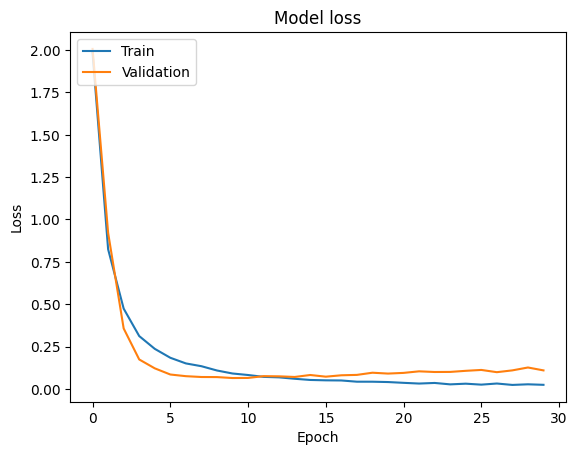

In [ ]:
#Printing the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Model evaluation

val_loss, val_acc = modeld.evaluate(X_test, y_test, batch_size=64)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9905 - loss: 0.0217


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


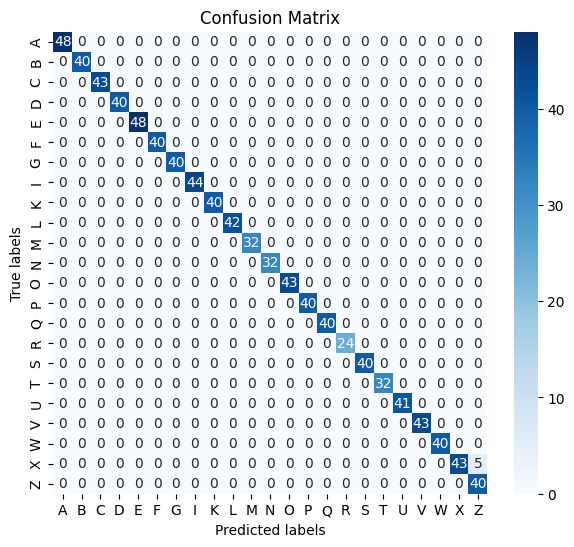

Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        48
           B       1.00      1.00      1.00        40
           C       1.00      1.00      1.00        43
           D       1.00      1.00      1.00        40
           E       1.00      1.00      1.00        48
           F       1.00      1.00      1.00        40
           G       1.00      1.00      1.00        40
           I       1.00      1.00      1.00        44
           K       1.00      1.00      1.00        40
           L       1.00      1.00      1.00        42
           M       1.00      1.00      1.00        32
           N       1.00      1.00      1.00        32
           O       1.00      1.00      1.00        43
           P       1.00      1.00      1.00        40
           Q       1.00      1.00      1.00        40
           R       1.00      1.00      1.00        24
           S       1.00      1.00      1.00        40
     

In [ ]:
# Load dataset
# Define the print_confusion_matrix function
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap='Blues', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))


predicted_probabilities = modeld.predict(X_test)
y_pred = np.argmax(predicted_probabilities, axis=1)

# Convert integer class labels to characters
y_test_chars = [chr(label + ord('A')) for label in y_test]
y_pred_chars = [chr(label + ord('A')) for label in y_pred]

# Print confusion matrix and classification report
print_confusion_matrix(y_test_chars, y_pred_chars)


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

OSError: No file or directory found at /content/keypoint_classifier.keras

In [ ]:
# Save as a model dedicated to inference
modeld.save(model_save_path, include_optimizer=False) #include_optimizer is False as we want to use the model for inference next, removing optimizer state makes the file lightweight

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(modeld)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmp2gqzf47a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 84), dtype=tf.float32, name='keras_tensor_90')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  132892613715600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892613712336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892593319248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892593309264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892613713680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892613717136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892593314448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132892593313680: TensorSpec(shape=(), dtype=tf.resource, name=None)


9144

In [ ]:
#Saving the model in .h5 format
modeld.save(hd5_save_path)